Names: Alexandros Mylonas, Mandus Aldag

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 

# Exercise 1: The Third Cumulant

Second central Moment:
\begin{align}
    &\sigma^2 = \langle(x-\mu)^2\rangle = \int dx P(x) (x-\mu)^2\\
    &=\int dx P(x) x^2 - \int dx P(x) 2x\mu + \int dx P(x) \mu^2 \\
    &= \langle x^2 \rangle - 2 \mu \mu + \mu^2 = \langle x^2 \rangle  - \mu^2 = \langle x^2 \rangle  - \langle x \rangle^2 
\end{align}

Also we know that: 
\begin{align}
    &G(k) = \sum_{j=1}^\infty \frac{(ik)^j}{j!} \langle x^j \rangle = 1+ik\mu - \frac{k^2\mu^2}{2} - \frac{\sigma^2\mu^2}{2} - \frac{ik^3}{6}\langle x^3 \rangle + \mathcal{O}(k^4)\\
    & = 1+ik\mu - \frac{k^2\mu^2}{2} - \frac{\sigma^2\mu^2}{2} - \frac{ik^3}{6}(\langle x^3 \rangle - \langle x \rangle^3 + \langle x \rangle^3) + \mathcal{O}(k^4)\\
    & = (1+ik\mu - \frac{k^2\mu^2}{2} - \frac{ik^3 \mu^3}{6} + \mathcal{O}(k^4)) \cdot (1-\frac{\sigma^2\mu^2}{2}+\mathcal{O}(k^4)) + \frac{ik^3 \mu \sigma^2}{2} - \frac{ik^3}{6}(\langle x^3 \rangle - \langle x\rangle ^3)\\
    & = (1+ik\mu - \frac{k^2\mu^2}{2} - \frac{ik^3 \mu^3}{6} + \mathcal{O}(k^4)) \cdot (1-\frac{\sigma^2\mu^2}{2}+\mathcal{O}(k^4)) - \frac{ik^3}{6}(\langle x^3 \rangle - \langle x\rangle ^3 -3\mu\sigma^2)
\end{align}

where the $\frac{ik^3 \mu \sigma^2}{2}$ is used to anhiliate an upcoming term from multypling out the brackets. \
Furtermore the  third central moment can be written as: 
\begin{align}
    &\langle(x-\mu)^3\rangle = \int dx P(x) (x-\mu)^3\\
    &=\int dx P(x) x^3 - \int dx P(x) 3x^2\mu + \int dx P(x) 3xmu^2 - \int dx P(x) \mu^3\\
    &= \langle x^3 \rangle - 3\mu \langle x^2 \rangle + 3 \mu^3 -\mu^3 \\
    &= \langle x^3 \rangle - 3\mu (\sigma^2+\mu^2) + 2 \mu^3 =  \langle x^3 \rangle - 3\mu\sigma^2+3\mu^3 + 2 \mu^3\\
    &= \langle x^3 \rangle - \langle x \rangle^3 - 3\mu\sigma^2 
\end{align}

Making use of this we can continue with the previous considerations:
\begin{align}
    &G(k)= (1+ik\mu - \frac{k^2\mu^2}{2} - \frac{ik^3 \mu^3}{6} + \mathcal{O}(k^4)) \cdot (1-\frac{\sigma^2\mu^2}{2}+\mathcal{O}(k^4)) - \frac{ik^3}{6}(\langle x^3 \rangle - \langle x\rangle ^3 -3\mu\sigma^2)\\
    & = (1+ik\mu - \frac{k^2\mu^2}{2} - \frac{ik^3 \mu^3}{6} + \mathcal{O}(k^4)) \cdot (1-\frac{\sigma^2\mu^2}{2}+\mathcal{O}(k^4)) (1-\frac{ik^3}{6}\langle(x-\mu)^3\rangle+\mathcal{O}(k^6))\\
    & = e^{ik\mu}+e^{-\frac{\sigma^2\mu^2}{2}} + e^{-\frac{ik^3}{6}\langle(x-\mu)^3\rangle} = e^{ik\mu-\frac{\sigma^2\mu^2}{2}-\frac{ik^3}{6}\kappa_3}
\end{align}


# Exercise 3.2: Evolution of the Sample Average

In [4]:
def laplace_dist(x, μ = 0.0, b = 1.0):
    return 1/(2*b)*np.exp(-np.abs(x-μ)/b)

## Single experiment

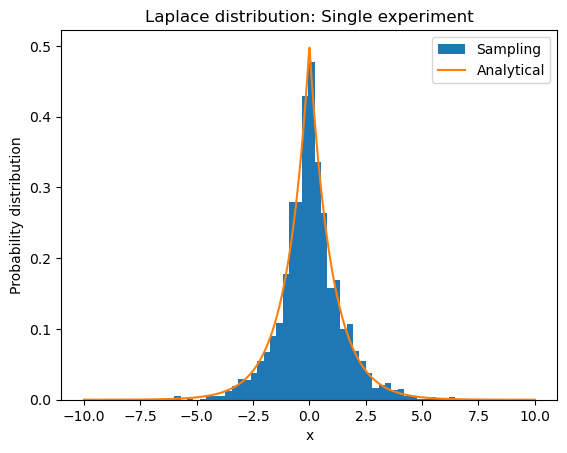

In [5]:
T = 2**11
sample = np.random.laplace(0.0,1.0,T)
xs = np.linspace(-10,10,T)
ys = laplace_dist(xs)
plt.hist(sample, bins=50 ,density = True, label = "Sampling")
plt.plot(xs,ys,label="Analytical")
plt.xlabel("x")
plt.ylabel("Probability distribution")
plt.title("Laplace distribution: Single experiment")
plt.legend()
plt.show()

## 20 experiments

In [9]:
def generate_St(tau=T):
    St = []
    sample = []
    for t in range(tau):
        sample.append(np.random.laplace())
        St.append(np.mean(sample))
    return St

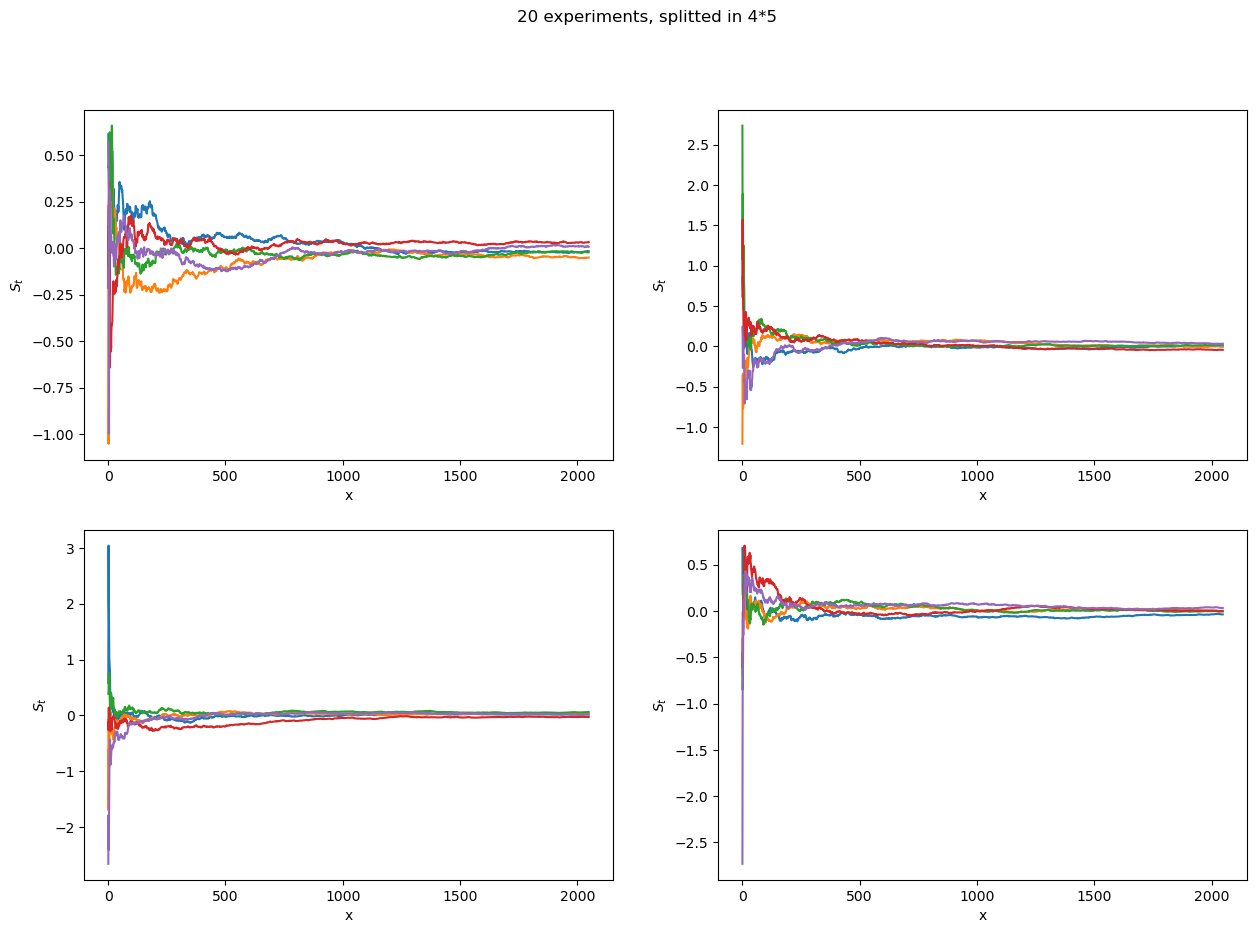

In [10]:
fig, axs = plt.subplots(2,2,figsize=(15, 10))
fig.suptitle('20 experiments, splitted in 4*5')
for i in [0,1]:
        for j in [0,1]:
                for n in range(5):
                    axs[i,j].plot(np.linspace(1,T,T),generate_St())

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.set(xlabel='x', ylabel=f'$S_t$')


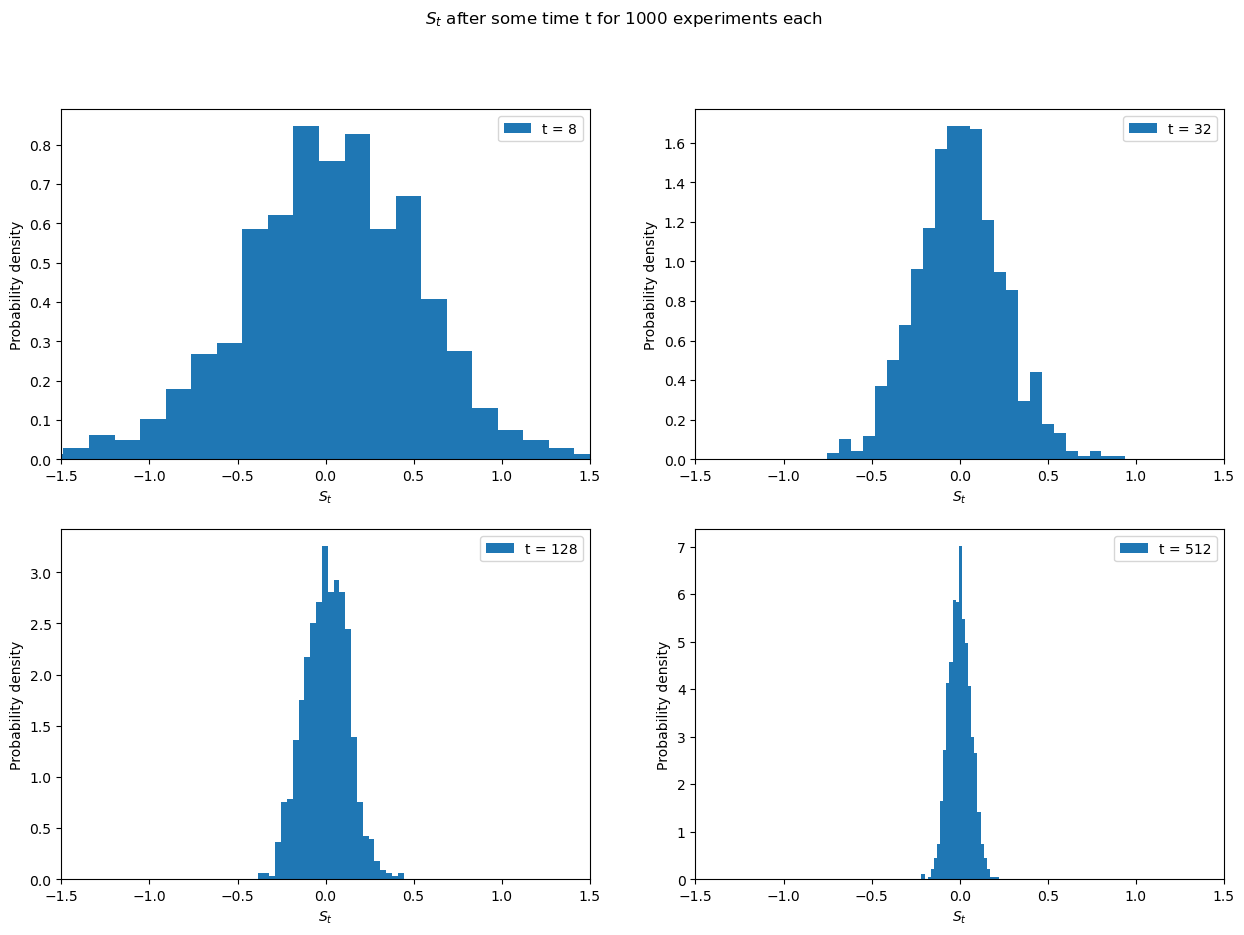

In [7]:
ts = [8,32,128,512]
X = 1000
S = {}
for t in ts:
    S[f'{t}'] = np.zeros(X)
    for x in range(X):
        S[f'{t}'][x] = np.mean(np.random.laplace(0.0,1.0,t))

fig, axs = plt.subplots(2,2,figsize=(15, 10))
fig.suptitle(f'$S_t$ after some time t for 1000 experiments each')
axs[0,0].hist(S['8'],density=True,label="t = 8",bins = 25) 
axs[0,1].hist(S['32'],density=True,label="t = 32",bins = 25)  
axs[1,0].hist(S['128'],density=True,label="t = 128",bins = 25)  
axs[1,1].hist(S['512'],density=True,label="t = 512",bins = 25) 
              
for ax in axs.flat:
    ax.set(xlabel=f'$S_t$', ylabel="Probability density",xlim=(-1.5,1.5))
    ax.legend()
        


In [62]:
X=1000
samples = np.zeros((X,T))
for x in range(X):
    samples[x,:] = generate_St()
stds = samples.std(axis=0)
   

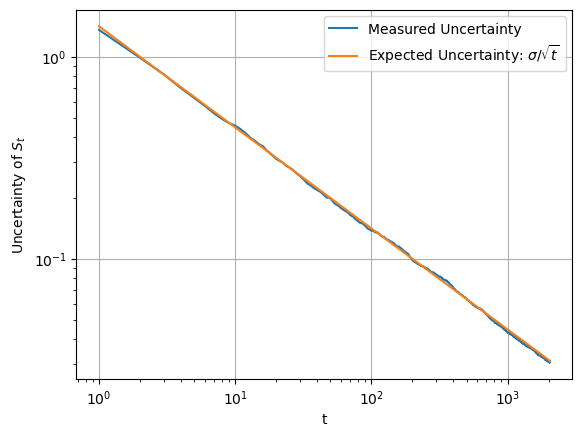

In [85]:
plt.loglog(np.linspace(1,T,T),stds,label="Measured Uncertainty")
plt.plot(np.linspace(1,T,T),np.sqrt(2)/np.sqrt(np.linspace(1,T,T)),label=r"Expected Uncertainty: $\sigma/ \sqrt{t}$")
plt.xlabel("t")
plt.ylabel(f"Uncertainty of $S_t$")
plt.legend()
plt.grid()

Calculating or doing research one finds that the standard deviation $\sigma$ of the Laplace distribution is $\sqrt{2}b$. We can therefore check if the the variance of the experiments really behaves as expected: Uncertainty $= \sigma/ \sqrt{t}$.\
Plotted below we see that this actually holds and that the uncertainty decreases with an increasing number of samples/time with $\sigma$ being the standard deviation of the distribution itself.\
This is exactly what is expected from the CLT: the sample mean should be normally distributed around the actual mean of the distribution with decreasing variance as the number of samples per experiment increases.

# Exercise 3.3 A Long-Tailed Distribution

## Single Expiriment

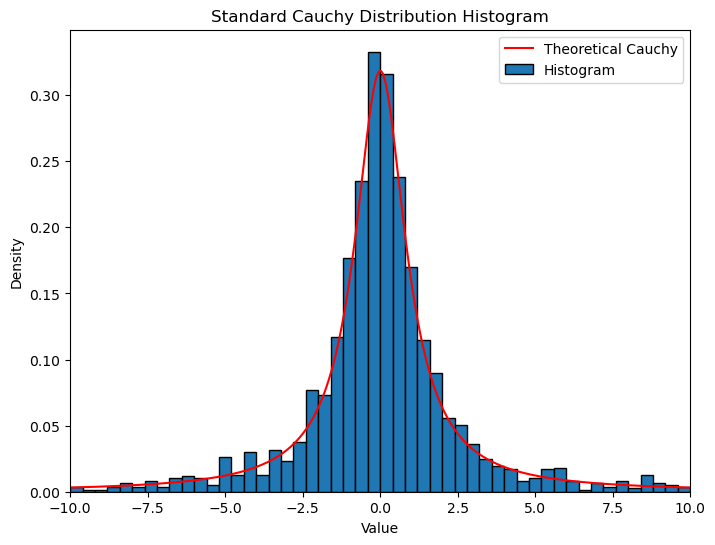

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def generate_cauchy_samples(n):
    """
    Generate random samples from a standard Cauchy distribution.

    Parameters:
    n (int): Number of samples to generate

    Returns:
    numpy.ndarray: Array of standard Cauchy-distributed random samples
    """
    return np.random.standard_cauchy(n)

# Example usage
num_samples = 2**11
cauchy_samples = generate_cauchy_samples(num_samples)

# Plot the histogram of the samples within the -10 to 10 range
plt.figure(figsize=(8, 6))

# Calculate the histogram
hist, bins = np.histogram(cauchy_samples, bins=50, range=(-10, 10), density=True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Plot the histogram
plt.bar(bin_centers, hist, width=bins[1] - bins[0], edgecolor='black', label="Histogram")

# Plot the theoretical standard Cauchy distribution curve
x = np.linspace(-10, 10, 1000)
pdf = 1 / (np.pi * (1 + x**2))
plt.plot(x, pdf, 'r-', label="Theoretical Cauchy")

plt.title("Standard Cauchy Distribution Histogram")
plt.xlabel("Value")
plt.ylabel("Density")
plt.xlim(-10, 10)
plt.legend()
plt.show()

## 20 Expiriments

In [20]:
def generate_St(tau=T):
    St = []
    sample = []
    for t in range(tau):
        sample.append(np.random.standard_cauchy())
        St.append(np.mean(sample))
    return St

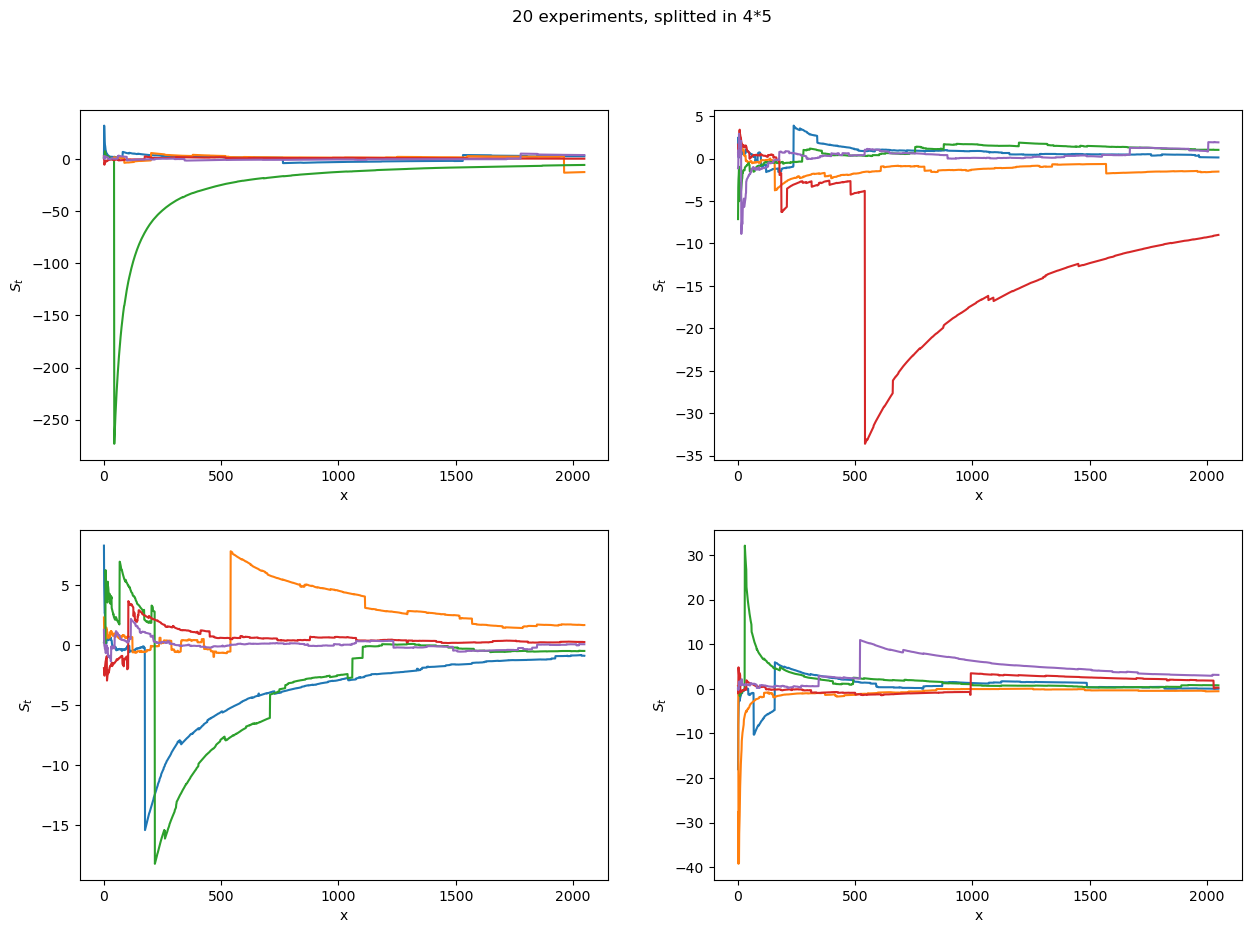

In [35]:
fig, axs = plt.subplots(2,2,figsize=(15, 10))
fig.suptitle('20 experiments, splitted in 4*5')
for i in [0,1]:
        for j in [0,1]:
                for n in range(5):
                    axs[i,j].plot(np.linspace(1,T,T),generate_St())

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.set(xlabel='x', ylabel=f'$S_t$')

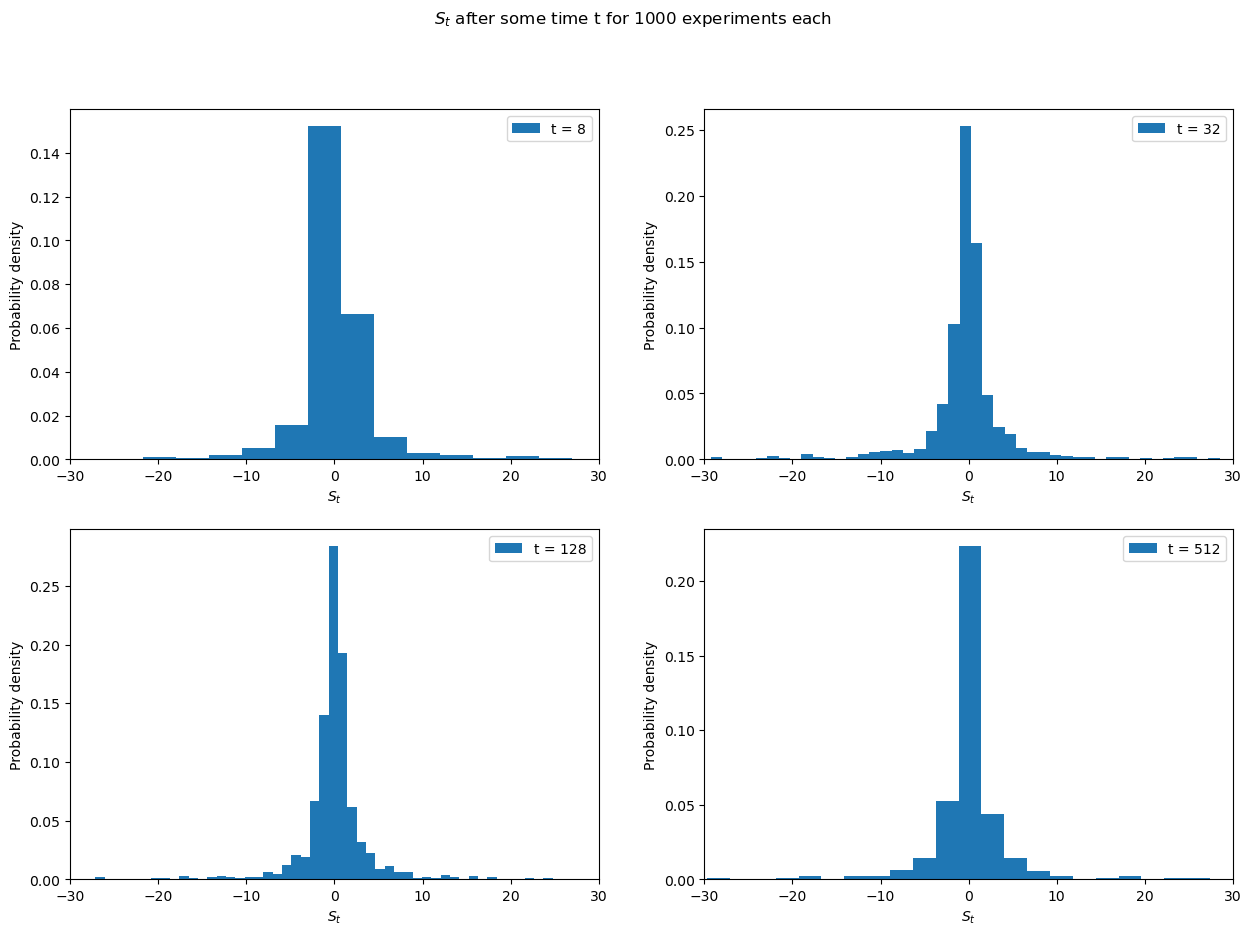

In [34]:
ts = [8,32,128,512]
X = 1000
S = {}
for t in ts:
    S[f'{t}'] = np.zeros(X)
    for x in range(X):
        S[f'{t}'][x] = np.mean(np.random.standard_cauchy(t))

fig, axs = plt.subplots(2,2,figsize=(15, 10))
fig.suptitle(f'$S_t$ after some time t for 1000 experiments each')
axs[0,0].hist(S['8'],density=True,label="t = 8",bins = 500) 
axs[0,1].hist(S['32'],density=True,label="t = 32",bins = 500)  
axs[1,0].hist(S['128'],density=True,label="t = 128",bins = 500)  
axs[1,1].hist(S['512'],density=True,label="t = 512",bins = 500) 
              
for ax in axs.flat:
    ax.set(xlabel=f'$S_t$', ylabel="Probability density",xlim=(-30,30))
    ax.legend()

In [24]:
X=1000
samples = np.zeros((X,T))
for x in range(X):
    samples[x,:] = generate_St()
stds = samples.std(axis=0)

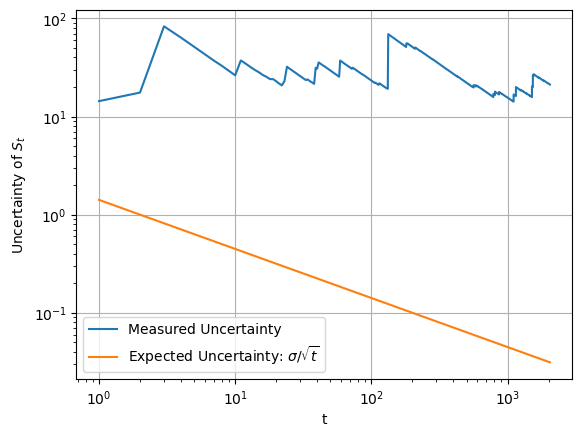

In [25]:
plt.loglog(np.linspace(1,T,T),stds,label="Measured Uncertainty")
plt.plot(np.linspace(1,T,T),np.sqrt(2)/np.sqrt(np.linspace(1,T,T)),label=r"Expected Uncertainty: $\sigma/ \sqrt{t}$")
plt.xlabel("t")
plt.ylabel(f"Uncertainty of $S_t$")
plt.legend()
plt.grid()

The main reason why the central limit theorem fails (CLT) for the Cauchy distribution is that the Cauchy distribution does not have a finite variance. Specifically, the Cauchy distribution is a heavy-tailed distribution, where the tails of the distribution decline proportionally to $1/x^2$ as $x$ goes to infinity. This means that the variance of the Cauchy distribution is undefined.
The Laplace distribution has a finite variance, thus the CLT applies. On the other hand, for the Cauchy distribution, the lack of a finite variance shows that the sample mean does not converge to a normal distribution as the number of samples increases.